# Algoritmos de optimización - Seminario

Nombre y Apellidos: Alfonso Cabrero de Diego<br>

Url: [Enlace a GitHub](https://github.com/acabrerod/miar/blob/main/03_miar_optimization_algorithms/final_project/03MIAR_scene_scheduling_problem.ipynb)<br>

Problema: *SESIONES DE DOBLAJE*


## Descripción del problema

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los servicios de los actores de doblaje sea el menor posible. Los datos son:

- Número de actores: $n = 10$
- Número de tomas : $m  = 30$
- Matriz de asignacion de actores a tomas : [https://bit.ly/36D8IuK](https://bit.ly/36D8IuK)


---

## Formulación del problema

El *scene scheduling problem* descrito arriba, puede formularse como el siguiente problema de programación lineal entera:

$$
\large
\begin{aligned}
\min \quad & \{\text{coste de rodaje}\} \\
\text{sujeto a} \quad & \text{Número de tomas por día} \leq  L \\
\end{aligned}
$$

Para su formulación, se definen las siguientes variables:

Sea $L = 6$ el número límite de tomas que se pueden grabar en un mismo día.

Sea $N \geq \left\lceil \frac{m}{L} \right\rceil$ el número de días para grabar todas las tomas.

Sea $c_{ij} \in \{0, 1\} =$ una constante que indica si el actor $i$ participa en la toma $j$ ;  $i = 1, \ldots n, j = 1, \ldots, m$

Entonces la matriz $C = \{ c_{ij} \}_{\substack{i=1,\ldots,n \\ j=1,\ldots,m}} \in \mathcal{M}_{m \times n}$ es la matriz de asignaciones de tomas a actores, definida de la siguiente manera:

$$
C = \overbrace{
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
}^{\text{Actores del 1 al 10}}
$$

Sea $y_{jk} \in \{0, 1\} = $ una variable binaria que indica si se graba la toma $j$ en el día $k$.

Sea $w_k = \sum_{i = 1}^n \mathbb{I} \left( \sum_{j = 1}^m c_{ij} y_{jk} > 0\right)$ el número de actores únicos necesitos en el día. 
La notación $\mathbb{I} (.)$ denota *indicador de*, que se utiliza para evitar contar los actores más de una vez.


Entonces, el problema se puede formular matemáticamente minimizando la suma de $w_k$, es decir, las dietas de los actores:

$$
\large
\begin{aligned}
\min \quad & \sum_{k = 1}^N w_k = \sum_{k = 1}^N \sum_{i = 1}^n \mathbb{I} \left( \sum_{j = 1}^m c_{ij} y_{jk} > 0\right) \\
\text{sujeto a} \quad & \sum_{j = 1}^m y_{jk} \leq L \quad & k = 1, \ldots, N \quad & \text{(límite por día de tomas)} \\
\quad & \sum_{k = 1}^N y_{jk} = 1 \quad & j = 1, \ldots, m \quad & \text{(se deben grabar todas las tomas)} \\
\quad & y_{jk} \in \{0, 1\} & \quad j = 1, \ldots, m ; k = 1, \ldots, N \quad & \text{(variables binarias)} \\
\end{aligned}
$$

El principal problema es que $N$ es desconocido a priori, por lo que las dimensiones de la matriz $Y = \{ y_{jk} \}$ también son indeterminadas. 
No obstante, podemos pensar que el coste mínimo para el rodaje se alcanzará con el número de días lo más reducido posible, lo que permite concentrar y optimizar al máximo los días de trabajo de los actores.
Por tanto, aumentar el número disponible de días de rodaje no es capaz per se de reducir el coste total, si bien no lo aumenta. Definiremos por tanto la constante $N = \left\lceil \frac{m}{L} \right\rceil = 5$.


In [1]:
import numpy as np

In [2]:
n, m = 10, 30   # Número de actores y número de tomas
L = 6           # Límite del número de tomas por cada día
N = 5           # Número de días disponibles

C = np.array([  # Matriz de asignaciones tomas-actores
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
], dtype = bool).T

# Matriz de asignaciones tomas-dias:
#       Cada toma se debe realizar en algún día, y no se pueden
#       realizar más de 6 tomas en un mismo día
Y = np.zeros((m, N), dtype = bool)

# Conjunto de todas las tomas
TOMAS = set(np.arange(0, m, dtype = np.uint8))

***

### (*) ¿Cuántas posibilidades hay sin tener en cuenta las restricciones?

Partiendo de la formulación, es evidente que todas las posibles soluciones del problema parten de todas las posibles combinaciones de la matriz $Y$. 
Si no se tienen en cuenta las restricciones, es decir, que todas las tomas de realizen siempre y en un único día, y que solo se puedan grabar un máximo de 6 por día, todas las combinaciones posibles serían las siguientes:

$$
\large
2^{m \cdot N}
$$ <!-- 2^{30 \cdot N} = 2^{150} \approx 1,427 \times 10^{45} -->

Ya que se trata una matriz binaria de $m \cdot N$ entradas.
El número concreto depende del número de días de grabación. 
Al no estar limitado a 6 grabaciones por día, el valor óptimo sería $N=1$, con $1.074 \times 10^9$  posibilidades. 
Aunque algunos otros valores posibles serían los siguientes:

| N | $N = 1$               | $N = 2$               | $N = 3$               | $N = 4$               | $N = 5$               | $N = 6$             | ... |
|------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|-----|
| $2^{30 \cdot N}$| $1.074 \times 10^9$ | $1.153 \times 10^{18}$ | $1.238 \times 10^{27}$ | $1.329 \times 10^{36}$ | $1.427 \times 10^{45}$ | $1.532 \times 10^{54}$ | ... |

Esta formulación no tiene en cuenta la restricción de que se deban realizar todas las tomas, por lo que todas las posiblidades reflejan todas las posibles combinaciones de tomas, ya sea no realizando ninguna (con todos los valores de $Y$ iguales a $0$), o realizando todas (todos los valores de $Y$ iguales a $1$, si $N>1$, se realizan todas las tomas todos los días), además de todas las posibilidades intermedias.


<br>

Sin embargo, otra formulación natural se puede realizar con un vector de enteros de $m$ entradas, donde cada una de las posiciones contiene un número entero entre $1$ y $N$. 
Esta formulación incluye de forma automática la restricción de que todas las tomas se deben realizar en un solo día, aunque sigue sin considerar el límite de 6 tomas por cada día. 
Con esta formulación, el número de posibilidades se reduce por varios órdenes de magnitud, que serían las siguientes:

$$
\large
N^m
$$ <!-- = 5^{30} \approx 9,313 \times 10^{20} -->

Ya que se trata de un vector de $m$ entradas, donde cada uno puede variar entre $N$ números enteros. 
El valor óptimo sin restricciones es lógicamente $N=1$, donde solo hay una posible combinación (se realizan todas las tomas), otros valores para $N$ son los siguientes:

| N | $N = 1$               | $N = 2$               | $N = 3$               | $N = 4$               | $N = 5$               | $N = 6$             | ... |
|------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|-----|
| $N^{30}$| $1$ | $1.074 \times 10^9$ | $2.059 \times 10^{14}$ | $1.153 \times 10^{18}$ | $9.313 \times 10^{20}$ | $2.211 \times 10^{23}$ | ... |


<br><br>

---

### ¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?

Para considerar adicionalmente todas las restricciones, podíamos pensar en añadir a la segunda formulación, la del vector de enteros, la condición de que $N \geq \left\lceil \frac{m}{L} \right\rceil$.
Tomando además $N=5$, ya que como se ha explicado, el número de días $N$ que minimiza el coste de la grabación será el más bajo posible, es decir, 5.
Sin embargo, esta condición no es suficiente, ya que podía darse el caso de que todas las tomas se concentrasen en un mismo día, sin cumplir con la restricción.

Para resolverlo, podemos pensar en crear 5 particiones de las 30 tomas, con 6 tomas cada una. 
Esto se parece al número combinatorio para extraer subconjuntos no ordenados de tamaño $k$ de un conjunto de tamaño $n$: $\binom{n}{k}$.
La diferencia en este caso es que tenemos que extraer 5 subconjuntos diferentes, y que sean además disjuntos entre sí.
Podemos llegar a este cálculo a través del razonamiento visto en la referencia [1], inspirado en un muestreo sin reemplazamiento.

Hay $ \binom{30}{6} $ formas de elegir la primera partición (las tomas que se realizan el primer día), después hay $ \binom{24}{6} $ formas de elegir las tomas que se realizan el segundo día entre las 24 tomas restantes que no se han grabado, etc ... El número total de combinaciones es el siguiente:

$$
\large
\binom{30}{6} \cdot \binom{24}{6} \cdot \binom{18}{6} \cdot \binom{12}{6} \cdot \binom{6}{6}= \frac{30!}{(6!)^5}
$$

Como además el orden de estos grupos no es relevante, podemos dividirlo por $5!$, obteniendo:

$$
\large
\frac{30!}{(6!)^5 \cdot 5!} \approx 1.142 \times 10^{16}
$$

Podemos leer este número como 11 mil 420 billones de combinaciones.

In [3]:
print(f"Número de combinaciones con formulación de matriz binaria (depende del número de días):")
print(f"\t{"".join([f'N = {i :<12}' for i in range(1, L + 1)])}")
print(f"\t{"".join([f'{2 ** (m * i):<16.3e}' for i in range(1, L + 1)])}\n")

print(f"Número de combinaciones con formulación de vector de enteros (depende del número de días):")
print(f"\t{"".join([f'N = {i :<12}' for i in range(1, 7)])}")
print(f"\t{"".join([f'{i ** m:<16.3e}' for i in range(1, 7)])}\n")


import math 
combinaciones_con_restricciones = math.factorial(m) / (math.factorial(N) * math.factorial(6) ** N)
print(f"Número de combinaciones con restricciones: {int(combinaciones_con_restricciones):_} ({combinaciones_con_restricciones:.3e})")

Número de combinaciones con formulación de matriz binaria (depende del número de días):
	N = 1           N = 2           N = 3           N = 4           N = 5           N = 6           
	1.074e+09       1.153e+18       1.238e+27       1.329e+36       1.427e+45       1.532e+54       

Número de combinaciones con formulación de vector de enteros (depende del número de días):
	N = 1           N = 2           N = 3           N = 4           N = 5           N = 6           
	1.000e+00       1.074e+09       2.059e+14       1.153e+18       9.313e+20       2.211e+23       

Número de combinaciones con restricciones: 11_423_951_396_577_720 (1.142e+16)


---
---


## Modelo para el espacio de soluciones

---

### (*) ¿Cuál es la estructura de datos que mejor se adapta al problema? Argumentalo (es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo).

La mejor estructura de datos será la que menor coste computacional tenga para realizar las operaciones más frecuentes de cara a resolver el problema. El coste de almacenar en memoria todas las variables es en todos los casos bastante bajo, necesitando aproximadamente 18 bytes para representar matriz binaria $Y$ de la formulación inicial, o 30 bytes si se considera la formulación en un vector de enteros (1 byte por número, aunque en principio se puedan representar con 3 bits). En cualquier caso, este coste será de orden $O(n\cdot m)$, ya que se necesita almacenar la matriz de asignación tomas-actores $C$.

Algunas de las operaciones más relevantes que se tendrán que realizar para resolver el problema de optimización, son las relacionadas con evaluar las restricciones, y las de evaluar la función objetivo. 
En la siguiente tabla se especifica el coste de estas operaciones, y de otras relacionadas, en una comparativa con otra estructura de datos alternativa: una lista de conjuntos.
Como el problema se trata de encontrar los $N = 5$ conjuntos de tamaño $L = 6$ tal que se minimice el coste de la grabación, hay muchas operaciones relacionadas con conjuntos, como pertenencia o el cálculo del número total de elementos, que son más eficientes con con conjuntos que con arrays.

<table>
  <tr>
    <th rowspan="2" style="width: 250px;">Operación</th>
    <th colspan="2">Coste computacional</th>
  </tr>
  <tr>
    <td>Para matriz Y</td>
    <td>Para lista de conjuntos</td>
  </tr>

  <tr>
    <td>Evaluación de la función objetivo (N veces la siguiente)</td>
    <td>O(nmN)</td>
    <td>O(nLN)</td>
  </tr>
  <tr>
    <td>Número de actores necesarios en un día determinado</td>
    <td>O(nm)</td>
    <td>O(nL)</td>
  </tr>
  
  <tr>
    <td>Verificar las restricciones de la solución (N veces las siguiente + la segunda siguiente)</td>
    <td>O(mN)</td>
    <td>O(m + NL)</td>
  </tr>
  <tr>
    <td>Número de tomas asignadas a un día determinado</td>
    <td>O(m)</td>
    <td>O(L)</td>
  </tr>
  <tr>
    <td>Comprobar que se realizan todas las tomas</td>
    <td>O(mN)</td>
    <td>O(m)</td>
  </tr>

  <!-- necesaria ? -->
  <!-- <tr> 
    <td>Determinar en qué día se hace una toma cualquiera</td>
    <td>O(N)</td>
    <td>O(N)</td>
  </tr>-->
  <tr>
    <td>Añadir o eliminar una toma a un día concreto</td>
    <td>O(1)</td>
    <td>O(1)</td>
  </tr>
  <tr>
    <td>Intercambiar una toma entre dos días determinados (para heurística 2-intercambios)</td>
    <td>O(1)</td>
    <td>O(1)</td>
  </tr>  
</table>

Como $L << m$, la estructura de datos con lista de conjuntos es más apropiada para este problema que la matriz propuesta originalmente. Por tanto, la estructura de datos elegida para el problema es un array de $N$ conjuntos de tamaño $L$, que se define formalmente en la siguiente pregunta.

In [4]:
# Estructura de datos para la solución
x: np.ndarray[set[np.uint8]] = np.array([ 
    set([ 
        np.uint8(6 * i + j) # Valores iniciales arbitarios
        for j in range(L)
    ])
    for i in range(N)
])


def print_solucion(x: np.ndarray[set[np.uint8]], **kwargs) -> None:
    print([
        set([ int(x_kj) for x_kj in x_k ]) 
        for x_k in x
    ], **kwargs)

print_solucion(x)

[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 23}, {24, 25, 26, 27, 28, 29}]


---
---

## Según el modelo para el espacio de soluciones

---

### (*)¿Cual es la función objetivo?

La función objetivo se ha definido formalmente al principio, basada en una formulación con una matriz binaria de asignaciones tomas-dias.
Esta función objetivo minimiza el coste total de la grabación, que de acuerdo con el enunciado del problema, es proporcional al número de dietas abonadas a los actores.
Se les paga a todos los actores por igual, y con independencia del número de tomas que grabe ese día. 
Por tanto, debemos calcular la suma para todos los días, el número de actores que son necesarios para las grabaciones de ese día.

Formalmente para la nueva formulación:
sea $x$ el vector de conjuntos propuesto como modelo para el espacio de soluciones, donde $x_k = \{ x_{k,1}, x_{k,2}, \cdots x_{k,L} \}$ es el conjunto de tomas que se graban en el día $k$.
Entonces, la función objetivo es la siguiente:

$$
\large
z = \sum_{k = 1}^N \sum_{i = 1}^n \mathbb{I} \left( \sum_{j \in x_k} c_{ij}  > 0\right)
$$

Donde $\mathbb{I} \left( \sum_{j \in x_k} c_{ij}  > 0\right)$ es el indicador de si el actor $i$ trabaja en el día $k$.

In [5]:
# Funciones para calcular la función objetivo

def get_actores_necesarios(tomas_a_grabar: set[np.uint8]) -> np.uint8:
    """ 
    Devuelve el número de actores necesarios para grabar las tomas en el conjunto
    ``tomas_a_grabar``, que corresponde a x_k en la notación de arriba.
    El número máximo de actores por día está limitado a 10, que son todos los que 
    hay, por lo que se utiliza el tipo de dato np.uint8
    """
    actores_necesarios = C[:, list(tomas_a_grabar)].sum(axis = 1, dtype = np.uint8)
    return np.sum(actores_necesarios > 0, dtype = np.uint8)


def get_dietas_totales(x: np.ndarray[set[np.uint8]]) -> np.uint8:
    """ Calcula la función objetivo """
    actores_por_dia = np.vectorize(get_actores_necesarios)(x)
    return np.sum(actores_por_dia, dtype = np.uint8)


get_dietas_totales(x)

np.uint8(38)

---

### (*)¿Es un problema de maximización o minimización?

El problema es de minimización, ya que se busca el menor coste posible para realizar la grabación. La formulación completa del problema es la siguiente:

$$
\large
\begin{aligned}
\min            \quad & z = \sum_{k = 1}^N \sum_{i = 1}^n \mathbb{I} \left( \sum_{j \in x_k} c_{ij}  > 0\right) \\
\text{sujeto a} \quad & |x_k| \leq L                                \quad & k = 1, \ldots, N \quad & \text{(límite por día de tomas)} \\
                \quad & \left| \bigcup_{k = 1}^{N} x_k \right| = m  \quad &                  \quad & \text{(se deben grabar todas las tomas)} \\
\end{aligned}
$$


Donde $|x_k|$ es el cardinal del conjunto $x_k$, es decir, el número de tomas que se graban en el día $k$

In [6]:
# Función para verificar restricciones

def verificar_solucion(x: np.ndarray[set[np.uint8]]) -> bool: 
    """ Verifica las restricciones del problema """
    # Restriccion de limite máximo de tomas por día
    tomas_por_dia = np.vectorize(len)(x)
    limite_maximo_por_dias = all(tomas_por_dia <= L)

    # Restricción de que se realicen todas las tomas
    todas_las_tomas = set.union(*x)
    se_realizan_todas_las_tomas = len(todas_las_tomas) == m

    return se_realizan_todas_las_tomas and limite_maximo_por_dias

verificar_solucion(x)

True

***

### Diseña un algoritmo para resolver el problema por fuerza bruta

Diseñamos un generador a partir de la clase combinations de itertools, para generar secuencialmente todas las combinaciones de soluciones posibles. A continuación del código mostramos como ejemplo las 10 primeras soluciones generadas.

In [7]:
# Generar nuevas soluciones para fuerza bruta
from itertools import combinations

def generar_conjunto(i, x: np.ndarray[set[np.uint8]]):
    usados = set.union(*x)
    disponibles = TOMAS.difference(usados)

    if i == 1:
        x[N - i] = set(disponibles)
        yield x
        return
    
    for grupo in combinations(disponibles, L):
        x[N - i] = set(grupo)
        yield from generar_conjunto(i - 1, x.copy())


# Ejemplos de las 10 primeras soluciones generadas
x_vacio = np.array([ set() for _ in range(N) ])
gen = generar_conjunto(N, x_vacio)

for _ in range(10):
    print_solucion(next(gen))

[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 23}, {24, 25, 26, 27, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 24}, {23, 25, 26, 27, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 25}, {23, 24, 26, 27, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 26}, {23, 24, 25, 27, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 27}, {23, 24, 25, 26, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 28}, {23, 24, 25, 26, 27, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 22, 29}, {23, 24, 25, 26, 27, 28}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17}, {18, 19, 20, 21, 23, 24}, {22, 25, 26, 27, 28, 29}]
[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9

Utilizamos una barra de progreso del paquete tqdm, para visualizar el progreso del algoritmo, y para que calcule una estimación del tiempo necesario.

In [8]:
from tqdm import tqdm
import sys


def fuerza_bruta(barra = True) -> None:
    # Barra de progreso para fuerza bruta
    iteraciones_totales = math.factorial(m) / (math.factorial(N) * math.factorial(L) ** N)
    if barra:        
        barra_de_progreso = tqdm(
            total = int(iteraciones_totales),
            file = sys.stdout, 
            ncols = 100,
            unit_scale = True,
            mininterval = 0.5
        )

    mejor_x = None
    mejor_z = 1e6

    x_vacio = np.array([ set() for _ in range(N) ])
    gen = generar_conjunto(N, x_vacio)

    # El bucle for va explorando secuencialmente todas las posibles soluciones
    for i, x in enumerate(gen):

        # Guardar la mejor solución vista hasta el momento
        z = get_dietas_totales(x)
        if z < mejor_z:
            mejor_x, mejor_z = x, z
            if barra:
                barra_de_progreso.set_postfix_str(f"Mejor sol: {mejor_z}")
        if barra:
            barra_de_progreso.update(1)

        # Detener la búsqueda después de 1 millón de soluciones
        if i >= 1e6 and iteraciones_totales > 1e12:
            if barra:
                barra_de_progreso.close()
            print("")
            print("Y seguiría hasta el infinito ...")
            print(f"Mejor valor objetivo encontrado en {i:_} de búsquedas: {mejor_z}")
            print("Mejor solución: x = ", end = "")
            print_solucion(mejor_x)
            break
    
    return mejor_x, mejor_z
        
x, z = fuerza_bruta()

  0%|                                | 1.00M/11.4P [01:14<237180676:22:20, 13.4kit/s, Mejor sol: 32]

Y seguiría hasta el infinito ...
Mejor valor objetivo encontrado en 1_000_000 de búsquedas: 32
Mejor solución: x = [{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}, {12, 13, 16, 17, 19, 26}, {14, 15, 21, 24, 27, 29}, {18, 20, 22, 23, 25, 28}]


Según la estimación de tqdm, este algoritmo tardaría en finalizar más de 200 millones de horas, cantidad que equivale aproximadamente a 230 siglos.

<br><br>

---

### Calcula la complejidad del algoritmo por fuerza bruta

El coste computacional de este algoritmo se puede calcular a partir del número combinatorio calculado en la segunda pregunta, que era el siguiente: $ \frac{30!}{(6!)^5 \cdot 5!} $. 
Este número nos da la cantidad de iteraciones que hará el algoritmo.
Generalizando esta expresión, obtenemos:

$$
\large \frac{m!}{(L!)^N \cdot N!}
$$

Donde $N = \left\lceil \frac{m}{L} \right\rceil$. 
Además, en cada iteración este algoritmo evalúa la función objetivo, que tiene un coste de $O(nLN)$, como se ha calculado en la tercera pregunta.
Por tanto, el coste computacional del algoritmo por fuerza bruta, llamémoslo $T(n, m, L)$, es:

$$
\large T(n, m, L) = O \left( \frac{m!}{(L!)^N \cdot N!} \cdot n L N\right)
$$

Donde:

 - $n$ es el número de actores
 - $m$ el número de tomas
 - $L$ el límite de tomas por día
 - $N = \left\lceil \frac{m}{L} \right\rceil$ el número de días necesarios

Con $L << m$.

<br><br>

***

### (*) Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Para resolver el problema vamos a utilizar el algoritmo metaheúristico GRASP. 
Este algoritmo es significativamente más eficiente que la fuerza bruta, ya que no explora todo el espacio de soluciones. 
En cambio, solo explora el entorno local de algunas soluciones que ya de por sí son razonables.
Las soluciones razonables se generan con el algoritmo heurístico greedy aleatorizado.
La diferencia de costes computacionales de ambos algoritmos se formaliza en la siguiente pregunta, calculando el órden de complejidad de GRASP.

<br>

Para implementar GRASP, primero creamos dos funciones para greedy aleatorizado, que se basa en una lista restringida de candidatos (RCL).

In [9]:
# Funciones para greedy aleatorizado

def calcular_criterio_greedy(x, candidato: np.uint8) -> dict[str, np.uint8]:
    """
    Calcula el criterio greedy para una determinada toma candidata,
    y una solucion parcial x. El criterio es el siguiente: 
    Que la asignación de una toma a un día aumente en lo mínimo posible
    el número de actores necesitados    
    """
    greedy = {
        dia: get_actores_necesarios(set(x[dia]).union({ candidato })) - get_actores_necesarios(x[dia])
        for dia in range(N)
        if len(x[dia]) < L
    }
    dia, valor_greedy = min(greedy.items(), key = lambda item: item[1])

    return { "dia": dia, "valor_greedy": valor_greedy }


def greedy_aleatorizado(rcl_size = 3) -> np.ndarray[set[np.uint8]]:
    """
    Devuelve una solución generada con el algoritmo de greedy aleatorizado,
    utilizando una lista restringida de candidatos (RCL) de tamaño ´´rcl_size´´
    """
    x = np.array([ set() for _ in range(N) ])
    usados = set.union(*x)
    candidatos = TOMAS.difference(usados)
        
    while len(candidatos) > 0:        
        criterio_greedy = [
            { "candidato": candidato, **calcular_criterio_greedy(x, candidato) }
            for candidato in candidatos
        ]
        criterio_greedy.sort(key = lambda d: d["valor_greedy"])
        rcl = criterio_greedy[:rcl_size] if len(criterio_greedy) >= rcl_size else criterio_greedy
        elegido = np.random.choice(rcl)
        
        x[elegido["dia"]].add(elegido["candidato"])

        usados = usados.union({ elegido["candidato"] })
        candidatos = TOMAS.difference(usados)
    return x

Demostración del funcionamiento de la función de greedy aleatorizado, mostrando la solución greedy no aleatorizada (con tamaño de la RCL de 1), y también representando en un histograma las distribuciones para la función objetivo de las soluciones generadas variando el tamaño de la RCL:

In [10]:
# Solución con greedy normal (tamaño de la RCL de 1)
x = greedy_aleatorizado(1)
print_solucion(x)
print(f"Valor objetivo: {get_dietas_totales(x)}")

[{1, 12, 15, 16, 18, 26}, {7, 8, 13, 17, 22, 23}, {3, 4, 14, 20, 27, 29}, {0, 2, 5, 6, 19, 21}, {9, 10, 11, 24, 25, 28}]
Valor objetivo: 31


In [11]:
import pandas as pd

# Calculamos los valores objetivo para varios tamaños de la RCL,
#       generando y evaluando 1000 soluciones con cada tamaño
df = pd.DataFrame([
    {
        "z": get_dietas_totales(greedy_aleatorizado(rcl_size)),
        "Tamaño de la RCL": rcl_size
    }
    for rcl_size in [2, 3, 4]
    for repeat in range(1_000)
])

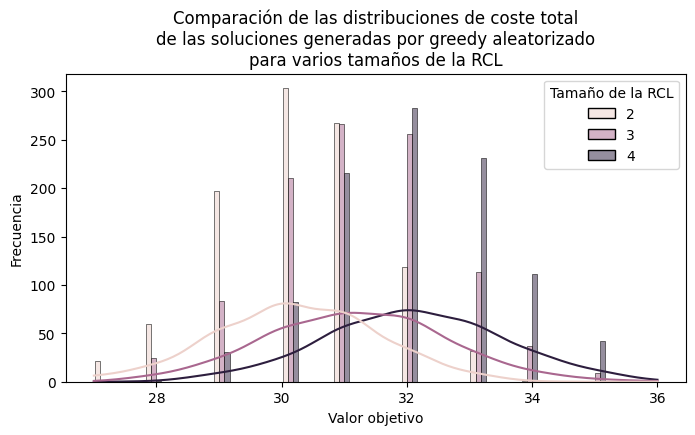

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dibujar un histograma
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = "z", hue = "Tamaño de la RCL", multiple = "dodge", shrink = 0.9, kde = True, kde_kws = { "bw_adjust": 1.5 })

# Títulos y etiquetas
plt.title(
    "Comparación de las distribuciones de coste total\n" +
    "de las soluciones generadas por greedy aleatorizado\n"
    "para varios tamaños de la RCL"
)
plt.xlabel("Valor objetivo")
plt.ylabel("Frecuencia")
plt.show()

Ahora definimos una función para mejorar una solución dada explorando su entorno local.
El entorno es 2-intercambios.
Se prueban todos los cambios posibles, y se elige el que más reduzca la función objetivo, repitiendo iterativamente este proceso hasta que ninguno de los intercambios mejore la solución.

In [13]:
# Funciones para búsqueda local

def get_dia_toma(x, toma):
    """ Calcula el día en el que se graba una determinada toma """
    return np.where(np.vectorize(lambda dia: toma in dia)(x))[0][0]


def heuristica_2_intercambios(x, candidato: np.uint8) -> np.ndarray[np.int8]:
    """
    Calcula todas las posibles mejoras de mover la toma ´´candidato´´ a
    cualquier otro día.
    x           -- solución actual
    candidato   -- toma que se quiere intercambiar
    """

    # Buscamos el día en el que se graba el candidato
    dia_candidato = get_dia_toma(x, candidato)

    # Precalculamos los costes de cada día, en np.int8 para permitir negativos
    actores_por_dia = np.vectorize(get_actores_necesarios)(x).astype(np.int8) 
    

    def intercambio(candidato: np.uint8, toma: np.uint8) -> np.int8:
        """ Calcula la mejora de intercambiar candidato con toma """
        dia_toma = get_dia_toma(x, toma)

        x_dia_candidato = x[dia_candidato].copy().union({ toma }).difference({ candidato })
        x_dia_toma = x[dia_toma].copy().union({ candidato }).difference({ toma })

        return get_actores_necesarios(x_dia_candidato).astype(np.int8) - actores_por_dia[dia_candidato] + \
            get_actores_necesarios(x_dia_toma).astype(np.int8) - actores_por_dia[dia_toma]
      

    # Calculamos las tomas con las que vamos a probar a intercambiar candidato,
    #   que son todas con índice mayor que candidato y que no estén en su mismo
    #   día
    tomas_para_intercambiar = list({ toma for toma in TOMAS if toma > candidato }.difference(x[dia_candidato]))

    # Calculamos las mejoras al intercambiar el candidato con todas las posibles
    mejoras = np.zeros(m, dtype = np.int8)
    if len(tomas_para_intercambiar) > 0:
        mejoras[tomas_para_intercambiar] = np.vectorize(lambda toma: intercambio(candidato, toma))(tomas_para_intercambiar)
    # print(candidato, mejoras)
    return mejoras


def busqueda_local_con_2_intercambios(x: np.ndarray[set[np.uint8]]) -> np.ndarray[set[np.uint8]]:
    """
    Ejecuta la heurística de búsqueda local mediante 2-intercambios. Calcula todos
    los posibles intercambios, y elige el mejor. Repite este proceso hasta que no
    encuentra mejoras.
    """
    while True:
        # Matriz de mejoras, es una matriz diagonal superior de tamaño m x m
        #   con algunos ceros, correspondientes a los intercambios de las
        #   tomas en el mismo día
        mejoras = np.stack([
            heuristica_2_intercambios(x, np.uint8(candidato))
            for candidato in list(TOMAS.difference({ np.uint8(29) }))
        ])

        # Mejor intercambio
        i, j = np.unravel_index(np.argmin(mejoras), mejoras.shape)
        if mejoras[i, j] >= 0:
            break

        dia_toma_i, dia_toma_j = get_dia_toma(x, i), get_dia_toma(x, j)
        x[dia_toma_i] = x[dia_toma_i].difference( { i }).union({ j })
        x[dia_toma_j] = x[dia_toma_j].difference( { j }).union({ i })

    return x

Demostración de la búsqueda local con 2-intercambios, aplicado sobre la solución greedy normal. Se ha intercambiado la toma 8 por la 20, entre el segundo y tercer día, reduciendo el coste en una unidad.

In [14]:
x = greedy_aleatorizado(1)
print_solucion(x)
print(f"Valor objetivo: {get_dietas_totales(x)}\n")

x = busqueda_local_con_2_intercambios(x)
print_solucion(x)
print(f"Valor objetivo: {get_dietas_totales(x)}")

[{1, 12, 15, 16, 18, 26}, {7, 8, 13, 17, 22, 23}, {3, 4, 14, 20, 27, 29}, {0, 2, 5, 6, 19, 21}, {9, 10, 11, 24, 25, 28}]
Valor objetivo: 31

[{1, 12, 15, 16, 18, 26}, {7, 13, 17, 20, 22, 23}, {3, 4, 8, 14, 27, 29}, {0, 2, 5, 6, 19, 21}, {9, 10, 11, 24, 25, 28}]
Valor objetivo: 30


Función para GRASP, que comienza sobre una solución generada con greedy aleatorizado, y que después la mejora mediante búsqueda local. Este proceso se repite numerosas veces y se selecciona la mejor solución explorada.

In [15]:
# Función para grasp

def grasp(numero_de_arranques_aleatorios = 100) -> tuple:
    mejor_x = None
    mejor_z = 1e6

    for _ in range(numero_de_arranques_aleatorios):
        x = greedy_aleatorizado(5)
        x = busqueda_local_con_2_intercambios(x)

        assert(verificar_solucion(x))

        z = get_dietas_totales(x)
        if z < mejor_z:
            mejor_x, mejor_z = x, z
    
    return mejor_x, mejor_z

Ejecución del algoritmo GRASP:

In [16]:
x, z = grasp()

print("*** Mejor solución encontrada ***\nx = ", end = "")
print_solucion(x)
print(f"Valor objetivo z = {z}")

*** Mejor solución encontrada ***
x = [{4, 8, 15, 24, 27, 29}, {13, 16, 17, 18, 22, 23}, {1, 5, 6, 12, 19, 26}, {2, 3, 10, 14, 20, 28}, {0, 7, 9, 11, 21, 25}]
Valor objetivo z = 27


<br><br>

***

### (*) Calcula la complejidad del algoritmo

El coste computacional del algoritmo GRASP depende del número de arranques aleatorios que eligamos, más el coste de generar las soluciones greedy aleatorizadas, la búsqueda local y evaluar la función objetivo.
Sea $r$ el número de arranques aleatorios para GRASP, $T_{greedy}(n, m, L)$ el coste de generar una solución con el algoritmo de greedy aleatorizado, $T_{busqueda}(n, m, L)$ el coste de la búsqueda local con 2-intercambios, y $T_{eval}(n,L)$ el coste de evaluar la función objetivo.
Entonces, la complejidad computacional de GRASP es:

$$
\large T_{grasp}(n,m,L) = r \left( T_{greedy}(n, m, L) + T_{busqueda}(m, n, L) + T_{eval}(n,L) \right)
$$

<br>

Podemos calcular el coste del algoritmo de greedy aleatorizado, $T_{greedy}(n, m, L)$, considerando que en cada iteración añade una toma a uno de los posibles días, realizando $m$ iteraciones. 
En cada iteración, calcula $O(m)$ criterios greedy, sobre todas las tomas que todavía no se han añadido a la solución.
Este criterio greedy tiene un coste equivalente a evaluar la función objetivo, ya que se comprueba el coste de añadir esta toma a cualquiera de los días (aunque se excluyen los días completos).
Por tanto, $T_{greedy}(n, m, L) = O(nm^2LN)$


Podemos calcular el coste del algoritmo de búsqueda local, $T_{busqueda}(n, m, L)$, sabiendo que realiza $O(m^2)$ operaciones para los intercambios, donde para cada una se calcula el número de actores asignados a los días implicados, una operación con coste $O(nL)$. 
Por tanto, $T_{busqueda}(n, m, L) = O(nm^2Lr_0)$, donde $r_0$ es el número de iteraciones que realiza el algoritmo de búsqueda.


El coste de evaluar la función objetivo ya se dedujo en la tercera pregunta, que es: $T_{eval}(n,L) = O(nLN)$

Resumiendo, los costes son los siguientes:

$$
T_{greedy}(n, m, L) = O(nm^2LN) \quad \quad \quad
T_{busqueda}(n, m, L) = O(nm^2Lr_0) \quad \quad \quad
T_{eval}(n,L) = O(nLN)
$$

Y por tanto el coste del algoritmo GRASP es:

$$
\large T_{grasp}(n,m,L) = O\left(r n m^2 L N r_0 \right)
$$


<br><br>

***

### Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Crear unos nuevos datos consiste básicamente en redefinir todas las constantes que hemos utilizado del problema.
El número de actores $n$, el número de tomas $m$, y el límite de tomas por día $L$ son elecciones arbitrarias, mientras que la matriz de asignación de actores a tomas se elige aleatoriamente con la semilla *1234*.

In [17]:
# Regeneramos todas las constantes del problema
n, m = 30, 11
L = 3
N = math.ceil(m / L)
TOMAS = set(np.arange(0, m, dtype = np.uint8))

# Matriz de asignaciones actores-tomas
np.random.seed(1234)
C = np.random.choice([True, False], size = (n, m))

<br>

***

### Aplica el algoritmo al juego de datos generado

Aplicamos todos los algoritmos que hemos diseñado para resolver el nuevo problema, que son:

1. Fuerza bruta, que obtiene la solución óptima
2. Greedy
3. Greedy + búsqueda local
4. GRASP

In [18]:
x, z = fuerza_bruta(barra = False)
msg = "SOLUCIÓN ÓPTIMA CON FUERZA BRUTA"
print(f"{msg:<35} z = {z}, x = ", end = "")
print_solucion(x)


x = greedy_aleatorizado(1)
z = get_dietas_totales(x)
msg = "SOLUCIÓN GREEDY"
print(f"{msg:35} z = {z}, x = ", end = "")
print_solucion(x)


x = busqueda_local_con_2_intercambios(x)
z = get_dietas_totales(x)
msg = "SOLUCIÓN GREEDY + BÚSQUEDA LOCAL"
print(f"{msg:<35} z = {z}, x = ", end = "")
print_solucion(x)


x, z = grasp()
msg = "SOLUCIÓN GRASP"
print(f"{msg:<35} z = {z}, x = ", end = "")
print_solucion(x)

SOLUCIÓN ÓPTIMA CON FUERZA BRUTA    z = 90, x = [{0, 8, 9}, {1, 3, 7}, {2, 10, 6}, {4, 5}]
SOLUCIÓN GREEDY                     z = 93, x = [{0, 8, 7}, {10, 4, 5}, {9, 2, 6}, {1, 3}]
SOLUCIÓN GREEDY + BÚSQUEDA LOCAL    z = 92, x = [{0, 8, 9}, {10, 4, 5}, {2, 6, 7}, {1, 3}]
SOLUCIÓN GRASP                      z = 90, x = [{0, 9, 8}, {2, 10, 6}, {1, 3, 7}, {4, 5}]


Como se puede apreciar, GRASP es capaz de obtener la solución óptima para este problema reducido.
Las soluciones obtenidas por fuerza bruta, greedy, y greedy + búsqueda local son deterministas, mientras que las de GRASP son aleatorias.

<br><br>

***

### Enumera las referencias que has utilizado (si ha sido necesario) para llevar a cabo el trabajo

[1] Referencia para calcular el número de combinaciones extrayendo particiones de un conjunto: [https://math.stackexchange.com/questions/1891143/number-of-ways-to-partition-a-set-into-subsets-of-given-cardinality](https://math.stackexchange.com/questions/1891143/number-of-ways-to-partition-a-set-into-subsets-of-given-cardinality)

[2] Long, X., & Zhao, J. (2020). Scheduling problem of movie scenes based on three meta-heuristic algorithms. *IEEE Access, 8, 59091-59099*. [https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9044871](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9044871).


<br><br>

---

### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Según la definición del *scene scheduling problem* de [2], este problema es normalmente más complejo en la vida real.
Entre los factores que hay que tener en cuenta son: diferentes remuneraciones de los actores, el coste de desplazamiento de una escena a otra, y diferentes duraciones de las escenas.
Los autores del paper utilizan 3 algoritmos metaheurísticos para resolverlo, que son: búsqueda tabú, optimización por enjambre de partículas y colonias de hormigas.


La solución presentada en este cuaderno se podría mejorar considerando estos algoritmos metaheurísticos, u otros más sencillos que requerirían menos cambios al código como simulated annealing, threshold accepting, record-to-record, etc.
Pero profundizando en la solución con GRASP, también se podría mejorar probando otros criterios greedy distintos, u otras formas de hacer búsqueda local, como 3-intercambios.

Tampoco hemos considerado métodos exactos para resolver el problema, como por ejemplo la búsqueda con ramificación y poda. Se podría al menos explorar este camino, aunque no hayamos hecho porque intiutivamente creemos que su coste sería demasiado alto.
